# CSE527 Homework1
**Due date: 11:59 pm on Oct 1, 2023 (EST)**

---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
```
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```  
    pip show pip
    pip --version
    pip -V
```

Incase of wrong version, use pip3 for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'HW1.ipynb' with your Jupyter Notebook and do your homework there.*


## Example
---
Please read through the following examples where we apply image thresholding to an image. This example is desinged to help you get familiar with the basics of Python and routines of OpenCV. This part is for your exercises only, you do not need to submit anything from this part.

In [1]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [2]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Replace '------' with the path such that "CSE527-22S-HW1" is your working directory
%cd '/content/gdrive/My Drive/MUPPARAPU_SAIKOUSHIK_114999629_hw1'

/content/gdrive/My Drive/MUPPARAPU_SAIKOUSHIK_114999629_hw1


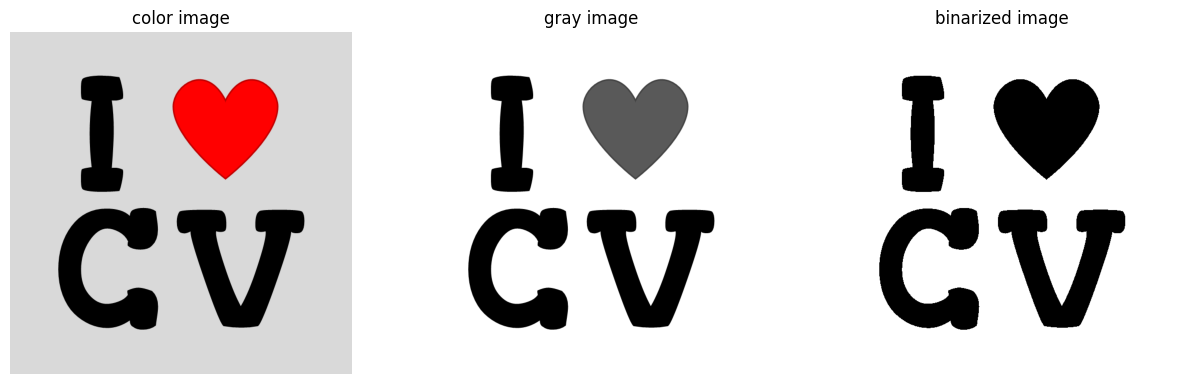

In [4]:
# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray

    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in range(height):
        for y in range(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)

    return bi_img

# read the image for local directory (same with this .ipynb)
img = cv2.imread('SourceImages/IloveCV.png')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a
# color image read from OpenCV
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('color image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

## Description
---
Homework 1 has 2 parts, each in a separate python notebook. Part 1 carries 50 points and part 2 carries 60 points, making a total of 110 points.  You need to fill the missing sections of code in both notebooks to complete the HW1. Be sure to read **Submission Guidelines** below. They are important.

In this notebook (part 1), there are three basic image processing problems in total with specific instructions for each of them.

## HW1 Problems  - Part 1 : (50 pts)
---

- **Problem 1.1 Gaussian filter {15 pts}:**

  (a) Write a function that takes two arguments, a width parameter and a sigma parameter, and returns a 2D array containing a Gaussian kernel of the desired dimension and variance. The peak of the Gaussian should be in the center of the array. Make sure to normalize the kernel such that the sum of all the elements in the array is 1. Use this function and the OpenCV’s `filter2D` routine to convolve the image and noisy image arrays with a 5x5 Gaussian kernel of sigma=1 and a 11x11 Gaussian kernel of sigma=2. There will be four output images from this problem, namely, image convolved with 5x5, and 11x11, noisy image convolved with 5x5, and 11x11.

  (b) Write a function that takes an image and its noisy version, and return the Peak Signal-to-Noise Ratio (PSNR) value. Refer to https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio for its mathematical form. Pay attention that you might need to do convertion between different data types.

  Once you fill in and run the codes, the outputs will be saved under `Results` folder. Also images will be displayed in the notebook with PSNR marked in the titles. Please only fill in the missing part as indicated by `##########--WRITE YOUR CODE HERE--##########` and do not modify other parts. The grading for this question will be based on the ground-truth PSNR and your results.

  Lena image is credit to https://www.ece.rice.edu/~wakin/images/.

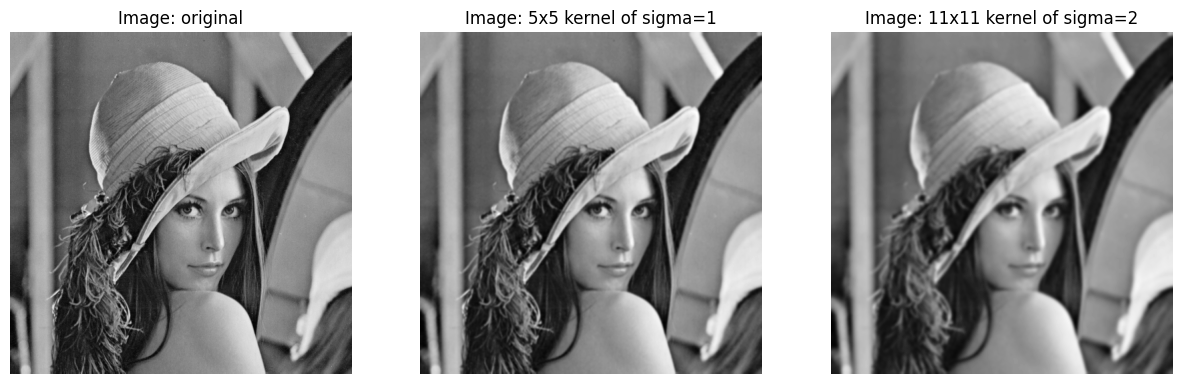

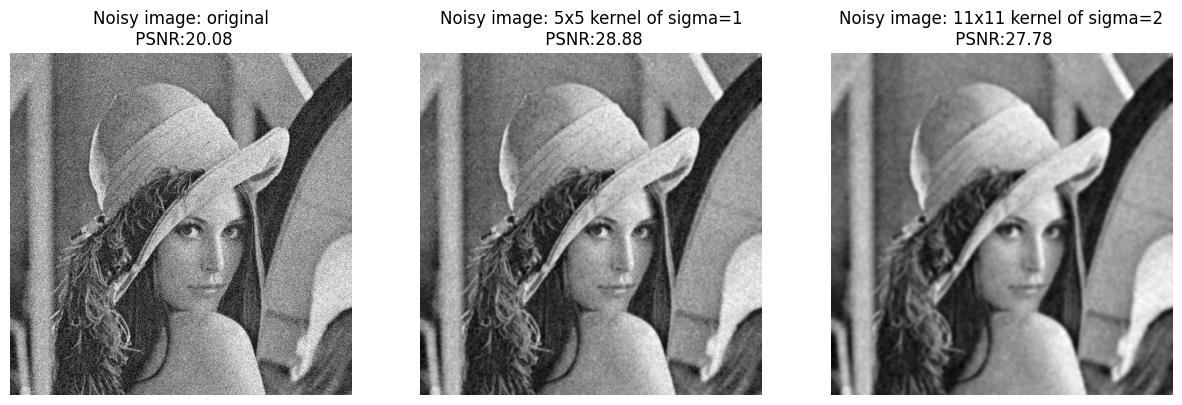

In [5]:
def genGaussianKernel(width, sigma):
    ##########--WRITE YOUR CODE HERE--##########
    kernel_1d = np.linspace(-(width-1)/2, (width-1)/2, width)
    kernel_1d = np.exp(-0.5 * (kernel_1d**2) / (sigma**2))
    kernel_2d = np.outer(kernel_1d, kernel_1d)
    kernel_2d /= np.sum(kernel_2d)  # Normalize the kernel
    ##########-------END OF CODE-------##########
    return kernel_2d

def PSNR(img, img_noise):
    ##########--WRITE YOUR CODE HERE--##########

    img = img.astype(np.float32)
    img_noise = img_noise.astype(np.float32)
    mse = np.mean((img - img_noise) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    PSNR = 20 * np.log10(max_pixel / np.sqrt(mse))

    ##########-------END OF CODE-------##########
    return PSNR

# Function to generate image with Gaussian noise
def addGaussianNoise(img, mean, std, seed=0):
    # suppose the input image is 2D gray image
    np.random.seed(seed)
    img_noise = img.astype(np.float32)/255.
    noise = np.random.normal(mean, std, img.shape)
    img_noise = img_noise + noise
    img_noise = np.clip(img_noise, 0., 1.)
    img_noise = (img_noise*255).astype(np.uint8)
    return img_noise

# Load images
img = cv2.imread('SourceImages/lena512.bmp', 0)

# Add Gaussian Noise
img_gnoise = addGaussianNoise(img, 0, 0.1)
PSNR_img_gnoise = PSNR(img, img_gnoise)

# Generate Gaussian kernels
kernel_1 = genGaussianKernel(5, 1)  # 5x5 kernel of sigma=1
kernel_2 = genGaussianKernel(11, 2)  # 11x11 kernel of sigma=2

# Convolve kernel with (noisy) image
img_kernel1 = cv2.filter2D(img, -1, kernel_1)
img_kernel2 = cv2.filter2D(img, -1, kernel_2)
img_gnoise_kernel1 = cv2.filter2D(img_gnoise, -1, kernel_1)
img_gnoise_kernel2 = cv2.filter2D(img_gnoise, -1, kernel_2)

PSNR_img_gnoise_kernel1 = PSNR(img, img_gnoise_kernel1)
PSNR_img_gnoise_kernel2 = PSNR(img, img_gnoise_kernel2)

# Write result images
if not os.path.exists("Results"):
  os.makedirs("Results")
cv2.imwrite("Results/P1_01.jpg", img_kernel1)
cv2.imwrite("Results/P1_02.jpg", img_kernel2)
cv2.imwrite("Results/P1_03.jpg", img_gnoise_kernel1)
cv2.imwrite("Results/P1_04.jpg", img_gnoise_kernel2)

# Plot results
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Image: original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_kernel1, 'gray')
plt.title('Image: 5x5 kernel of sigma=1')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_kernel2, 'gray')
plt.title('Image: 11x11 kernel of sigma=2')
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noisy image: original\n PSNR:{0:.2f}'.format(PSNR_img_gnoise))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gnoise_kernel1, 'gray')
plt.title('Noisy image: 5x5 kernel of sigma=1\n PSNR:{0:.2f}'
                        .format(PSNR_img_gnoise_kernel1))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_gnoise_kernel2, 'gray')
plt.title('Noisy image: 11x11 kernel of sigma=2\n PSNR:{0:.2f}'
                        .format(PSNR_img_gnoise_kernel2))
plt.axis("off")

plt.show()


- **Problem 1.2 Median filter {15 pts}:** \\
(a) Write a function to generate an image with salt and pepper noise. The function takes three arguments, the input image, the probability that a pixel location has salt-pepper noise and a random seed for repitability. A simple implementation can be to select pixel locations with probability 'p' where noise occurs and then with equal probability set the pixel value at those location to be 0 or 255.(**Hint: Use np.random.uniform and np.random.choice**)

 (b) Write a function to implement a median filter. The function takes two arguments, an image and a window size (if window size is 'k', then a kxk window is used to determine the median pixel value at a location) and returns the output image. **Do not** use any inbuilt library (like scipy.ndimage_filter) to directly generate the result. (**Hint: Use cv2.copyMakeBorder to add borders**)  

 You need to generate two noisy images corrupted by salt-and-pepper noise with noise probability equals 0.1 and 0.2. And then use median filter of window size=5 to denoise the two noisy images. You also need to denoise them with Gaussian filters. Try different parameters of Gaussian filters to get as higher PSNR as possible. Fill in all the missing parts and do not modify others.


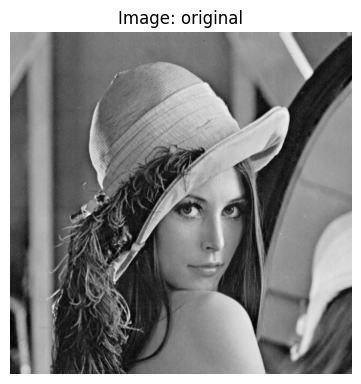

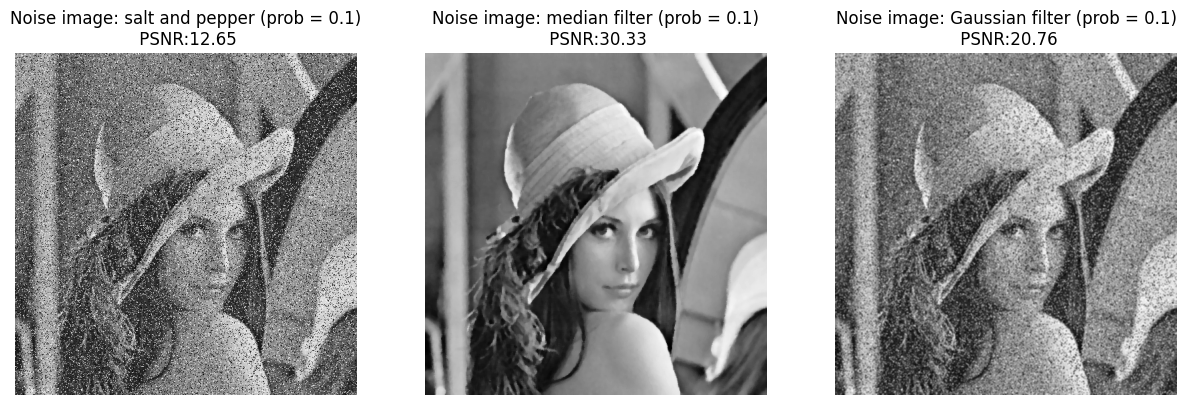

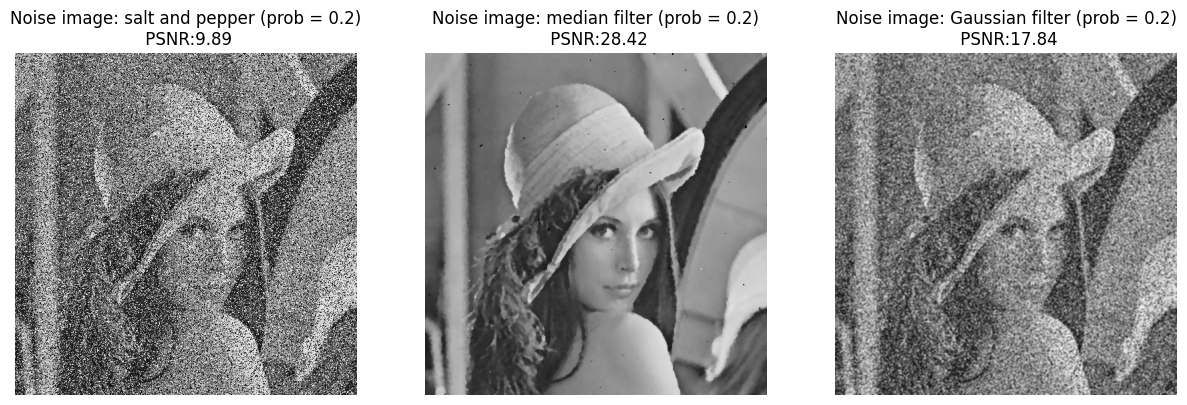

In [6]:
# Function to generate image with salt and pepper noise
def addSaltPepperNoise(img, prob=0.1, seed=0):
    np.random.seed(seed)
    ##########--WRITE YOUR CODE HERE--##########
    img_noise = np.copy(img)
    salt_indices = np.random.choice(range(img.shape[0] * img.shape[1]), size=int(prob * img.size), replace=False)
    pepper_indices = np.random.choice(range(img.shape[0] * img.shape[1]), size=int(prob * img.size), replace=False)
    img_noise.flat[salt_indices] = 255
    img_noise.flat[pepper_indices] = 0
    #print(img_noise)
    ##########-------END OF CODE-------##########
    return img_noise

# Function to apply median filter (window size kxk) on the input image
def medianFilter(img, window_size=5 ):

  ##########--WRITE YOUR CODE HERE--##########
    border_size = window_size // 2
    img_padded = cv2.copyMakeBorder(img, border_size, border_size, border_size, border_size, cv2.BORDER_REFLECT)
    img_filtered = np.zeros_like(img)
    for i in range(border_size, img_padded.shape[0] - border_size):
        for j in range(border_size, img_padded.shape[1] - border_size):
            window = img_padded[i - border_size:i + border_size + 1, j - border_size:j + border_size + 1]
            median_value = np.median(window)
            img_filtered[i - border_size, j - border_size] = median_value
  ##########-------END OF CODE-------##########
    return img_filtered



img_spnoise_p1 = addSaltPepperNoise(img, prob=0.1)
PSNR_img_spnoise_p1 = PSNR(img, img_spnoise_p1)

img_spnoise_p2 = addSaltPepperNoise(img, prob=0.2)
PSNR_img_spnoise_p2 = PSNR(img, img_spnoise_p2)


img_spnoise_p1_MedianFilter = medianFilter(img_spnoise_p1, window_size=5)
PSNR_img_spnoise_p1_MedianFilter = PSNR(img, img_spnoise_p1_MedianFilter)

img_spnoise_p2_MedianFilter = medianFilter(img_spnoise_p2, window_size=5)
PSNR_img_spnoise_p2_MedianFilter = PSNR(img, img_spnoise_p2_MedianFilter)

# Generate Gaussian kernels
kernel_1 = genGaussianKernel(3, 1)
kernel_2 = genGaussianKernel(3, 2)



# Convolve filters with image and noisy image
img_spnoise_p1_GaussianFilter = cv2.filter2D(img_spnoise_p1, -1, kernel_1)
PSNR_img_spnoise_p1_GaussianFilter = PSNR(img, img_spnoise_p1_GaussianFilter)

img_spnoise_p2_GaussianFilter = cv2.filter2D(img_spnoise_p2, -1, kernel_2)
PSNR_img_spnoise_p2_GaussianFilter = PSNR(img, img_spnoise_p2_GaussianFilter)

cv2.imwrite("Results/P1_05.jpg", img_spnoise_p1_MedianFilter)
cv2.imwrite("Results/P1_06.jpg", img_spnoise_p1_GaussianFilter)
cv2.imwrite("Results/P1_07.jpg", img_spnoise_p2_MedianFilter)
cv2.imwrite("Results/P1_08.jpg", img_spnoise_p2_GaussianFilter)

# Plot results
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Image: original')
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_spnoise_p1, 'gray')
plt.title('Noise image: salt and pepper (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_spnoise_p1_MedianFilter, 'gray')
plt.title('Noise image: median filter (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1_MedianFilter))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_spnoise_p1_GaussianFilter, 'gray')
plt.title('Noise image: Gaussian filter (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1_GaussianFilter))
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_spnoise_p2, 'gray')
plt.title('Noise image: salt and pepper (prob = 0.2)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p2))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_spnoise_p2_MedianFilter, 'gray')
plt.title('Noise image: median filter (prob = 0.2)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p2_MedianFilter))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_spnoise_p2_GaussianFilter, 'gray')
plt.title('Noise image: Gaussian filter (prob = 0.2)\n PSNR:{0:.2f}'
                  .format(PSNR_img_spnoise_p2_GaussianFilter))
plt.axis("off")

plt.show()

- **Problem 1.3 Bilateral Filter  {20 pts}:**   

Start with the following tutorials:
https://en.wikipedia.org/wiki/Bilateral_filter

A bilateral filter includes a range kernel and a spatial kernel. Both kernels are Gaussian kernels on different domains. In this problem, the std of the range kernel is set for [0, 255] intensity range. So keep the padded input image as int dtype in [0, 255]. Following the tutorial, we first get the unnormalized version of the two kernels and then jointly normalize the combined kernel for each pixel. The results might be slightly different from the reference result.

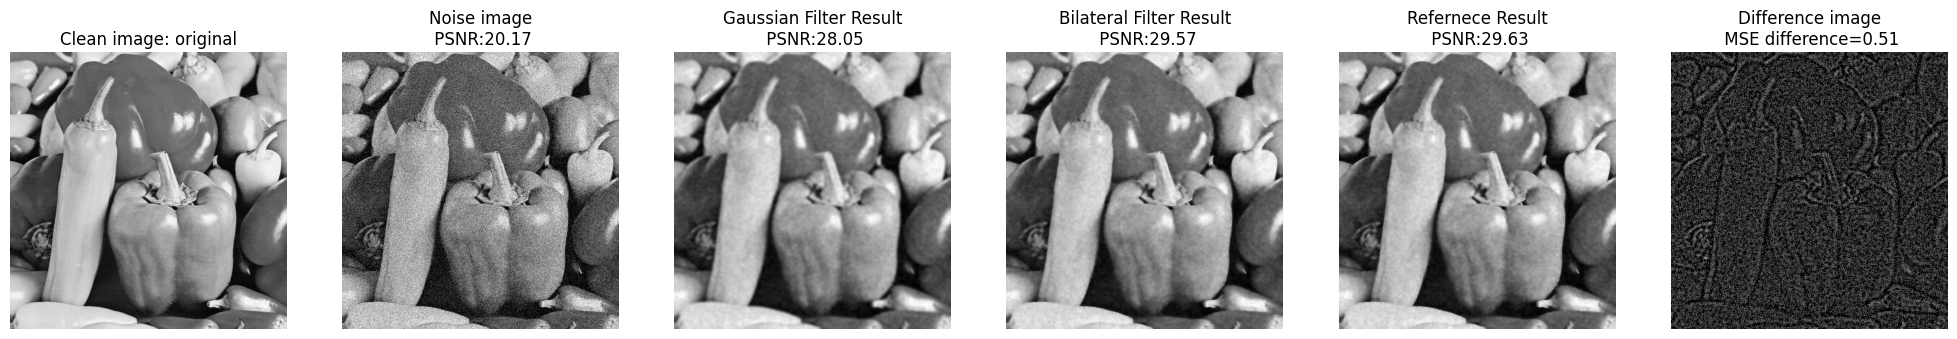

In [7]:
d = 11  # diameter
sigma_r = 75.  # sigma_r is for [0, 255] intensity range
sigma_s = 2.

img_bi = cv2.imread('SourceImages/peppers.bmp', 0)
img_noisy = addGaussianNoise(img_bi, 0, 0.1)

# calculate the unnormalized range kernel for the input (square) patch and its center pixel
def range_kernel(patch, sigma_r):
    #kernel_r = np.zeros(patch.shape)  # the width of a patch is d
    ##########--WRITE YOUR CODE HERE--##########
    kernel_r = np.exp(-0.5 * ((patch - patch[patch.shape[0]//2, patch.shape[1]//2])**2) / (sigma_r**2))
    ##########-------END OF CODE-------##########
    return kernel_r

# calculate the unnormalized spatial kernel
def spatial_kernel(d, sigma_s):
    kernel_s = np.zeros((d, d))
    ##########--WRITE YOUR CODE HERE--##########
    for i in range(-d//2, d//2 + 1):
        for j in range(-d//2, d//2 + 1):
            kernel_s[i + d//2, j + d//2] = np.exp(-0.5 * (i**2 + j**2) / (sigma_s**2))
    ##########-------END OF CODE-------##########
    return kernel_s

# function of applying bilateral filter to an image
# Note: remember to jointly normalize the two kernels for each pixel
def bilateral_filter(img, d, sigma_r, sigma_s):
    p = d // 2
    img_pad = cv2.copyMakeBorder(img, p, p, p, p, cv2.BORDER_REFLECT_101).astype('int')
    result = np.zeros(img.shape)
    ##########--WRITE YOUR CODE HERE--##########

    for i in range(p, img_pad.shape[0] - p):
        for j in range(p, img_pad.shape[1] - p):
            patch = img_pad[i - p:i + p + 1, j - p:j + p + 1]
            kernel_r = range_kernel(patch, sigma_r)
            kernel_s = spatial_kernel(d, sigma_s)
            kernel_combined = kernel_r * kernel_s
            kernel_normalized = kernel_combined / np.sum(kernel_combined)
            result[i - p, j - p] = np.sum(patch * kernel_normalized)

    ##########-------END OF CODE-------##########
    return result

img_dn = bilateral_filter(img_noisy, d, sigma_r, sigma_s).astype('uint8')
img_ref = cv2.bilateralFilter(img_noisy, d, sigma_r, sigma_s)
img_gauss = cv2.GaussianBlur(img_noisy, (d, d), sigma_s)

img_diff = np.abs(img_dn.astype('int') - img_ref.astype('int')).astype('uint8')

# Plot the results
fig = plt.figure(figsize=(25, 5))
plt.subplot(1, 6, 1)
plt.imshow(img_bi, 'gray')
plt.title('Clean image: original')
plt.axis("off")

plt.subplot(1, 6, 2)
plt.imshow(img_noisy, 'gray')
plt.title('Noise image\n PSNR:{0:.2f}'
                        .format(PSNR(img_bi, img_noisy)))
plt.axis("off")

plt.subplot(1, 6, 3)
plt.imshow(img_gauss, 'gray')
plt.title('Gaussian Filter Result\n PSNR:{0:.2f}'
                        .format(PSNR(img_bi, img_gauss)))
plt.axis("off")

plt.subplot(1, 6, 4)
plt.imshow(img_dn, 'gray')
plt.title('Bilateral Filter Result\n PSNR:{0:.2f}'
                        .format(PSNR(img_bi, img_dn)))
plt.axis("off")

plt.subplot(1, 6, 5)
plt.imshow(img_ref, 'gray')
plt.title('Refernece Result\n PSNR:{0:.2f}'
                        .format(PSNR(img_bi, img_ref)))
plt.axis("off")

plt.subplot(1, 6, 6)
plt.imshow(img_diff, 'gray')
plt.title('Difference image\n MSE difference={0:.2f}'
                        .format(np.mean(img_diff**2)))
plt.axis("off")

cv2.imwrite("Results/P1_09.jpg", img_dn);

## Submission guidelines
---
This s
Your need to submit a single zip file to Blackboard described as follow.

Please generate a pdf file that includes a ***google shared link*** (explained in the next paragraph). This pdf file should be named as ***Surname_Givenname_SBUID_hw*\*.pdf** (example: LeCun_Yann_111234567_hw1.pdf for this assignment).

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_SBUID_hw**** in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Surname_Givenname_SBUID_hw1
        |---Results
        |---SourceImages
        |---CSE527_23F_HW1_P1.ipynb
        |---CSE527_23F_HW1_P2.ipynb
        |---CSE527_23F_HW1.pdf

```
Note that this folder should be in your Google Drive with your Stony Brook account.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter TA's email. For the HW1 it is only zihan.ding@stonybrook.edu. Make sure that TAs who have the link **can edit**, ***not just*** **can view**, and also **uncheck** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in blackboard.

To submit to Blackboard, zip ***Surname_Givenname_SBUID_hw**** folder and name your zip file as ***Surname_Givenname_SBUID_hw*\*.zip**.

The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_SBUID_hw1' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

**Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.**

**Late submission penalty: **<br>
There will be a 10% penalty per day for late submission. However, you will have 3 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.
